First, the imports

In [1]:
from pandas import DataFrame, Series
import pandas as pd

Next, load the data:

In [4]:
stations = pd.read_table("stations.tsv")
usage = pd.read_table("usage_2012.tsv")
weather = pd.read_table("daily_weather.tsv")

## Average temperature by season

In [5]:
weather.columns

Index([u'date', u'weekday', u'season_code', u'season_desc', u'is_holiday', u'is_work_day', u'weather_code', u'weather_desc', u'temp', u'subjective_temp', u'humidity', u'windspeed', u'no_casual_riders', u'no_reg_riders', u'total_riders'], dtype='object')

In [6]:
weather.head

<bound method DataFrame.head of            date  weekday  season_code season_desc  is_holiday  is_work_day  \
0    2012-01-01        0            1      Spring           0            0   
1    2012-01-02        1            1      Spring           1            0   
2    2012-01-03        2            1      Spring           0            1   
3    2012-01-04        3            1      Spring           0            1   
4    2012-01-05        4            1      Spring           0            1   
5    2012-01-06        5            1      Spring           0            1   
6    2012-01-07        6            1      Spring           0            0   
7    2012-01-08        0            1      Spring           0            0   
8    2012-01-09        1            1      Spring           0            1   
9    2012-01-10        2            1      Spring           0            1   
10   2012-01-11        3            1      Spring           0            1   
11   2012-01-12        4        

In [7]:
weather.groupby('season_desc')['temp'].mean()

season_desc
Fall           0.711445
Spring         0.321700
Summer         0.554557
Winter         0.419368
Name: temp, dtype: float64

### What's wrong with the seasons?

In [8]:
weather.groupby('season_desc')['date'].agg(['min', 'max'])

,min,max
season_desc,,
Fall,2012-06-21,2012-09-22
Spring,2012-01-01,2012-12-31
Summer,2012-03-21,2012-06-20
Winter,2012-09-23,2012-12-20


off by one!

In [9]:
season_remap = { "Fall" : "Summer", "Summer" : "Spring", "Spring" : "Winter", "Winter" : "Fall" }

In [21]:
weather['season_desc'] = weather['season_desc'].apply(season_remap.get)


In [22]:
weather.groupby('season_desc')['temp'].mean()

season_desc
Fall           0.419368
Spring         0.554557
Summer         0.711445
Winter         0.321700
Name: temp, dtype: float64

## Fix Dates

In [23]:
weather.date

0     2012-01-01
1     2012-01-02
2     2012-01-03
3     2012-01-04
4     2012-01-05
5     2012-01-06
6     2012-01-07
7     2012-01-08
8     2012-01-09
9     2012-01-10
10    2012-01-11
11    2012-01-12
12    2012-01-13
13    2012-01-14
14    2012-01-15
...
351    2012-12-17
352    2012-12-18
353    2012-12-19
354    2012-12-20
355    2012-12-21
356    2012-12-22
357    2012-12-23
358    2012-12-24
359    2012-12-25
360    2012-12-26
361    2012-12-27
362    2012-12-28
363    2012-12-29
364    2012-12-30
365    2012-12-31
Name: date, Length: 366, dtype: object

In [24]:
pd.to_datetime(weather.date)

0    2012-01-01
1    2012-01-02
2    2012-01-03
3    2012-01-04
4    2012-01-05
5    2012-01-06
6    2012-01-07
7    2012-01-08
8    2012-01-09
9    2012-01-10
10   2012-01-11
11   2012-01-12
12   2012-01-13
13   2012-01-14
14   2012-01-15
...
351   2012-12-17
352   2012-12-18
353   2012-12-19
354   2012-12-20
355   2012-12-21
356   2012-12-22
357   2012-12-23
358   2012-12-24
359   2012-12-25
360   2012-12-26
361   2012-12-27
362   2012-12-28
363   2012-12-29
364   2012-12-30
365   2012-12-31
Name: date, Length: 366, dtype: datetime64[ns]

In [25]:
weather['date'] = pd.to_datetime(weather.date)

In [26]:
usage.columns

Index([u'bike_id', u'time_start', u'time_end', u'duration_mins', u'station_start', u'station_end', u'cust_type'], dtype='object')

In [27]:
usage['time_start'] = pd.to_datetime(usage.time_start)

In [28]:
usage['time_end'] = pd.to_datetime(usage.time_end)

In [29]:
usage.time_start

0    2012-01-01 00:04:00
1    2012-01-01 00:10:00
2    2012-01-01 00:10:00
3    2012-01-01 00:15:00
4    2012-01-01 00:15:00
5    2012-01-01 00:17:00
6    2012-01-01 00:18:00
7    2012-01-01 00:22:00
8    2012-01-01 00:24:00
9    2012-01-01 00:25:00
10   2012-01-01 00:29:00
11   2012-01-01 00:30:00
12   2012-01-01 00:32:00
13   2012-01-01 00:32:00
14   2012-01-01 00:33:00
...
2412509   2012-12-31 09:05:00
2412510   2012-12-31 09:05:00
2412511   2012-12-31 09:04:00
2412512   2012-12-31 09:04:00
2412513   2012-12-31 09:02:00
2412514   2012-12-31 09:02:00
2412515   2012-12-31 09:02:00
2412516   2012-12-31 09:02:00
2412517   2012-12-31 09:01:00
2412518   2012-12-31 09:01:00
2412519   2012-12-31 09:01:00
2412520   2012-12-31 09:01:00
2412521   2012-12-31 09:00:00
2412522   2012-12-31 09:00:00
2412523   2012-12-31 09:00:00
Name: time_start, Length: 2412524, dtype: datetime64[ns]

In [33]:
usage.time_start.dt.month

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
...
2412509    12
2412510    12
2412511    12
2412512    12
2412513    12
2412514    12
2412515    12
2412516    12
2412517    12
2412518    12
2412519    12
2412520    12
2412521    12
2412522    12
2412523    12
Length: 2412524, dtype: int64

In [40]:
usage.time_start.dt.month.value_counts()

3     329308
9     218573
8     214503
2     205958
7     203607
6     202600
10    198841
5     195638
1     193180
4     173954
11    152649
12    123713
dtype: int64

## Rentals v Temperature

In [41]:
weather.columns

Index([u'date', u'weekday', u'season_code', u'season_desc', u'is_holiday', u'is_work_day', u'weather_code', u'weather_desc', u'temp', u'subjective_temp', u'humidity', u'windspeed', u'no_casual_riders', u'no_reg_riders', u'total_riders'], dtype='object')

In [42]:
weather['month'] = weather.date.dt.month

In [43]:
weather.groupby('month')['total_riders'].sum()

month
1         96744
2        103137
3        164875
4        174224
5        195865
6        202830
7        203607
8        214503
9        218573
10       198841
11       152664
12       123713
Name: total_riders, dtype: int64

In [44]:
temps = weather['temp']


In [75]:
temps.index = weather.date.apply(lambda x: x.date())

In [76]:
temps

date
2012-01-01    0.370000
2012-01-02    0.273043
2012-01-03    0.150000
2012-01-04    0.107500
2012-01-05    0.265833
2012-01-06    0.334167
2012-01-07    0.393333
2012-01-08    0.337500
2012-01-09    0.224167
2012-01-10    0.308696
2012-01-11    0.274167
2012-01-12    0.382500
2012-01-13    0.274167
2012-01-14    0.180000
2012-01-15    0.166667
...
2012-12-17    0.393333
2012-12-18    0.410833
2012-12-19    0.332500
2012-12-20    0.330000
2012-12-21    0.326667
2012-12-22    0.265833
2012-12-23    0.245833
2012-12-24    0.231304
2012-12-25    0.291304
2012-12-26    0.243333
2012-12-27    0.254167
2012-12-28    0.253333
2012-12-29    0.253333
2012-12-30    0.255833
2012-12-31    0.215833
Name: temp, Length: 366, dtype: float64

In [77]:
temp_dict = temps.to_dict()

In [78]:
temp_dict

{datetime.date(2012, 1, 1): 0.37,
 datetime.date(2012, 1, 2): 0.27304299999999998,
 datetime.date(2012, 1, 3): 0.14999999999999999,
 datetime.date(2012, 1, 4): 0.1075,
 datetime.date(2012, 1, 5): 0.26583299999999999,
 datetime.date(2012, 1, 6): 0.33416699999999999,
 datetime.date(2012, 1, 7): 0.39333299999999999,
 datetime.date(2012, 1, 8): 0.33750000000000002,
 datetime.date(2012, 1, 9): 0.22416700000000001,
 datetime.date(2012, 1, 10): 0.30869600000000003,
 datetime.date(2012, 1, 11): 0.27416699999999999,
 datetime.date(2012, 1, 12): 0.38250000000000001,
 datetime.date(2012, 1, 13): 0.27416699999999999,
 datetime.date(2012, 1, 14): 0.17999999999999999,
 datetime.date(2012, 1, 15): 0.16666700000000001,
 datetime.date(2012, 1, 16): 0.19,
 datetime.date(2012, 1, 17): 0.37304299999999996,
 datetime.date(2012, 1, 18): 0.30333300000000002,
 datetime.date(2012, 1, 19): 0.19,
 datetime.date(2012, 1, 20): 0.2175,
 datetime.date(2012, 1, 21): 0.17333299999999999,
 datetime.date(2012, 1, 22): 0

In [83]:
usage['date'] = usage['time_start'].apply(lambda x: x.date())

In [90]:
rentals_by_date = usage.groupby('date')['bike_id'].count()

In [91]:
rentals_by_date

date
2012-01-01    4588
2012-01-02    3900
2012-01-03    4466
2012-01-04    4734
2012-01-05    6538
2012-01-06    8182
2012-01-07    9040
2012-01-08    6848
2012-01-09    4740
2012-01-10    7184
2012-01-11    4348
2012-01-12    8182
2012-01-13    6414
2012-01-14    4982
2012-01-15    4612
...
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
2012-12-20    4128
2012-12-21    3623
2012-12-22    1749
2012-12-23    1787
2012-12-24     920
2012-12-25    1013
2012-12-26     441
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: bike_id, Length: 366, dtype: int64

In [92]:
counts_and_weather = DataFrame({"rentals" : rentals_by_date, "temp" : temps})

In [93]:
counts_and_weather

,rentals,temp
date,,
2012-01-01,4588,0.370000
2012-01-02,3900,0.273043
2012-01-03,4466,0.150000
2012-01-04,4734,0.107500
2012-01-05,6538,0.265833
2012-01-06,8182,0.334167
2012-01-07,9040,0.393333
2012-01-08,6848,0.337500
2012-01-09,4740,0.224167


In [94]:
counts_and_weather.corr()

,rentals,temp
rentals,1.000000,0.272782
temp,0.272782,1.000000


In [96]:
weather.index = weather.date

In [97]:
weather

,date,weekday,season_code,season_desc,is_holiday,is_work_day,weather_code,weather_desc,temp,subjective_temp,humidity,windspeed,no_casual_riders,no_reg_riders,total_riders,month
date,,,,,,,,,,,,,,,,
2012-01-01,2012-01-01,0,1,Winter,0,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.370000,0.375621,0.692500,0.192167,686,1608,2294,1
2012-01-02,2012-01-02,1,1,Winter,1,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.273043,0.252304,0.381304,0.329665,244,1707,1951,1
2012-01-03,2012-01-03,2,1,Winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.150000,0.126275,0.441250,0.365671,89,2147,2236,1
2012-01-04,2012-01-04,3,1,Winter,0,1,2,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.107500,0.119337,0.414583,0.184700,95,2273,2368,1
2012-01-05,2012-01-05,4,1,Winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.265833,0.278412,0.524167,0.129987,140,3132,3272,1
2012-01-06,2012-01-06,5,1,Winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.334167,0.340267,0.542083,0.167908,307,3791,4098,1
2012-01-07,2012-01-07,6,1,Winter,0,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.393333,0.390779,0.531667,0.174758,1070,3451,4521,1
2012-01-08,2012-01-08,0,1,Winter,0,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.337500,0.340258,0.465000,0.191542,599,2826,3425,1
2012-01-09,2012-01-09,1,1,Winter,0,1,2,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.224167,0.247479,0.701667,0.098900,106,2270,2376,1


In [99]:
weather['counts'] = rentals_by_date

In [100]:
weather[['counts', 'temp']].corr()

,counts,temp
counts,1.000000,0.272782
temp,0.272782,1.000000


In [101]:
weather[['counts', 'temp']][weather['season_desc'] == 'Summer'].corr()

,counts,temp
counts,1.000000,-0.326098
temp,-0.326098,1.000000


In [102]:
weather[['counts', 'temp']][weather['season_desc'] == 'Winter'].corr()

,counts,temp
counts,1.000000,0.778723
temp,0.778723,1.000000


In [103]:
weather[['counts', 'temp']][weather['season_desc'] == 'Spring'].corr()

,counts,temp
counts,1.000000,-0.008046
temp,-0.008046,1.000000


In [104]:
weather[['counts', 'temp']][weather['season_desc'] == 'Fall'].corr()

,counts,temp
counts,1.000000,0.626595
temp,0.626595,1.000000


# Visualization

In [106]:
%matplotlib inline

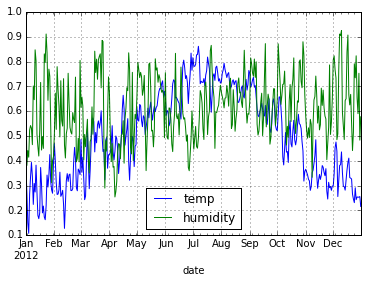

In [110]:
weather[['temp', 'humidity']].plot()

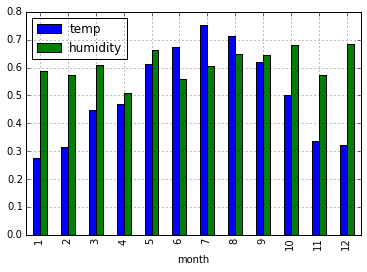

In [113]:
weather.groupby('month')[['temp', 'humidity']].mean().plot(kind='bar')

In [115]:
import matplotlib.pyplot as plt

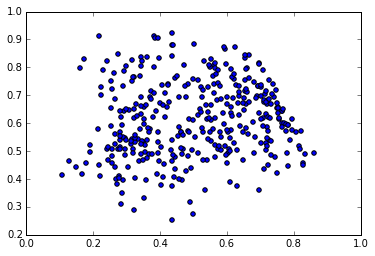

In [116]:
plt.scatter(weather['temp'], weather['humidity'])

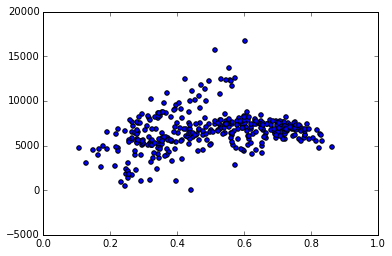

In [117]:
plt.scatter(weather['temp'], weather['counts'])

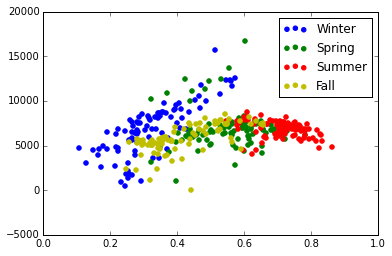

In [119]:
for season, color in zip(['Winter', 'Spring', 'Summer', 'Fall'], ['b', 'g', 'r', 'y']):
    plt.scatter(weather['temp'][weather.season_desc == season], weather['counts'][weather.season_desc == season], label=season, color=color)
plt.legend()

In [121]:
weather[weather['counts'] > 10000]

,date,weekday,season_code,season_desc,is_holiday,is_work_day,weather_code,weather_desc,temp,subjective_temp,humidity,windspeed,no_casual_riders,no_reg_riders,total_riders,month,counts
date,,,,,,,,,,,,,,,,,
2012-02-23,2012-02-23,4,1,Winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.454167,0.444446,0.554583,0.190913,516,4546,5062,2,10096
2012-03-08,2012-03-08,4,1,Winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.527500,0.524604,0.567500,0.441563,486,4896,5382,3,10748
2012-03-12,2012-03-12,1,1,Winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.466667,0.459592,0.489167,0.207713,838,4460,5298,3,10580
2012-03-13,2012-03-13,2,1,Winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.565000,0.542929,0.617500,0.236950,762,5085,5847,3,11666
2012-03-14,2012-03-14,3,1,Winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.572500,0.548617,0.507083,0.115062,997,5315,6312,3,12610
2012-03-15,2012-03-15,4,1,Winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.557500,0.532825,0.579583,0.149883,1005,5187,6192,3,12366
2012-03-17,2012-03-17,6,1,Winter,0,0,2,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.514167,0.505046,0.755833,0.110704,3155,4681,7836,3,15664
2012-03-18,2012-03-18,0,1,Winter,0,0,2,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.472500,0.464000,0.810000,0.126883,2207,3685,5892,3,11780
2012-03-19,2012-03-19,1,1,Winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.545000,0.532821,0.728750,0.162317,982,5171,6153,3,12292


In [122]:
stations

,id,station,terminal_name,lat,long,no_bikes,no_empty_docks,fast_food,parking,restaurant,...,museum,sculpture,hostel,picnic_site,tour_guide,attraction,landmark,motel,guest_house,gallery
0,1,20th & Bell St,31000,38.856100,-77.051200,7,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18th & Eads St.,31001,38.857250,-77.053320,6,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,20th & Crystal Dr,31002,38.856400,-77.049200,9,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15th & Crystal Dr,31003,38.860170,-77.049593,4,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Aurora Hills Community Ctr/18th & Hayes St,31004,38.857866,-77.059490,5,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Pentagon City Metro / 12th & S Hayes St,31005,38.862303,-77.059936,8,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,S Joyce & Army Navy Dr,31006,38.863700,-77.063300,7,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Crystal City Metro / 18th & Bell St,31007,38.857300,-77.051100,11,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,12th & Army Navy Dr,31008,38.862900,-77.052800,3,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,27th & Crystal Dr,31009,38.848441,-77.051516,6,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [123]:
usage

,bike_id,time_start,time_end,duration_mins,station_start,station_end,cust_type,temp,date
0,W01412,2012-01-01 00:04:00,2012-01-01 00:11:00,7,7th & R St NW / Shaw Library,7th & T St NW,Registered,0.370000,2012-01-01
1,W00524,2012-01-01 00:10:00,2012-01-01 00:29:00,19,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Casual,0.370000,2012-01-01
2,W00235,2012-01-01 00:10:00,2012-01-01 00:29:00,19,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Registered,0.370000,2012-01-01
3,W00864,2012-01-01 00:15:00,2012-01-01 00:23:00,8,14th & V St NW,Park Rd & Holmead Pl NW,Registered,0.370000,2012-01-01
4,W00995,2012-01-01 00:15:00,2012-01-01 00:23:00,8,11th & Kenyon St NW,7th & T St NW,Registered,0.370000,2012-01-01
5,W00466,2012-01-01 00:17:00,2012-01-01 00:23:00,6,Court House Metro / 15th & N Uhle St,Lynn & 19th St North,Registered,0.370000,2012-01-01
6,W00525,2012-01-01 00:18:00,2012-01-01 00:47:00,29,37th & O St NW / Georgetown University,9th & Upshur St NW,Registered,0.370000,2012-01-01
7,W00340,2012-01-01 00:22:00,2012-01-01 00:27:00,5,14th & V St NW,15th & P St NW,Registered,0.370000,2012-01-01
8,W00466,2012-01-01 00:24:00,2012-01-01 00:33:00,9,Lynn & 19th St North,25th St & Pennsylvania Ave NW,Registered,0.370000,2012-01-01
9,W00963,2012-01-01 00:25:00,2012-01-01 00:40:00,15,14th & V St NW,L'Enfant Plaza / 7th & C St SW,Registered,0.370000,2012-01-01


In [138]:
station_counts = usage.groupby('station_start')['station_start'].count()

In [173]:
sc = DataFrame()
sc['rentals'] = station_counts.values / 366.0
sc['station'] = station_counts.index
sc

,rentals,station
0,17.289617,10th & E St NW
1,10.418033,10th & Monroe St NE
2,71.243169,10th & U St NW
3,55.773224,10th St & Constitution Ave NW
4,35.185792,11th & H St NE
5,61.816940,11th & Kenyon St NW
6,10.183060,12th & Army Navy Dr
7,23.256831,12th & L St NW
8,3.554645,12th & Newton St NE
9,52.019126,13th & D St NE


In [174]:
stations2 = pd.merge(stations, sc, left_on='station', right_on='station')

In [181]:
stations2.columns.tolist()

['id',
 'station',
 'terminal_name',
 'lat',
 'long',
 'no_bikes',
 'no_empty_docks',
 'fast_food',
 'parking',
 'restaurant',
 'convenience',
 'post_office',
 'bicycle_parking',
 'drinking_water',
 'recycling',
 'waste_basket',
 'waste_disposal',
 'cafe',
 'currency_exchange',
 'fountain',
 'ice_cream',
 'optician',
 'pharmacy',
 'tanning_salon',
 'car_sharing',
 'alcohol',
 'bank',
 'bar',
 'club',
 'embassy',
 'food_court',
 'government',
 'internal_kindergarten',
 'kindergarten',
 'place_of_worship',
 'post_box',
 'pub',
 'vending_machine',
 'fuel',
 'grave_yard',
 'public_building',
 'school',
 'fire_station',
 'nightclub',
 'atm',
 'hospital',
 'doctors',
 'theatre',
 'university',
 'clock',
 'parking_entrance',
 'police',
 'cultural_center',
 'stripclub',
 'marketplace',
 'dry_cleaner',
 'bicycle_repair_station',
 'office',
 'arts_centre',
 'library',
 'studio',
 'strip_club',
 'tourist',
 'veterinary',
 'community_centre',
 'compressed_air',
 'tutor',
 'clinic',
 'dentist',
 'b

In [150]:
from sklearn.linear_model import LinearRegression

In [314]:
model = LinearRegression()

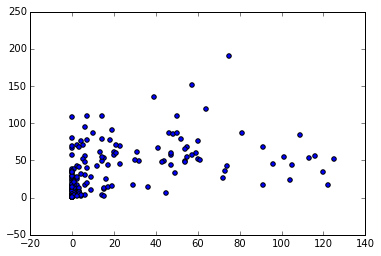

In [315]:
plt.scatter(stations2.crossing, stations2.rentals)

In [317]:
model.fit(stations2[['crossing']], stations2.rentals)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [318]:
model.coef_

array([ 0.46523832])

In [319]:
model.intercept_

25.641599031542192

In [320]:
predicted = model.predict(stations2[['crossing']])

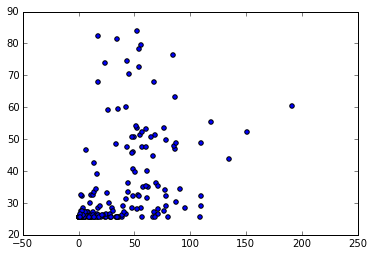

In [321]:
plt.scatter(stations2.rentals, predicted)

In [164]:
model.singular_

array([ 420.08785439])

In [165]:
from sklearn.metrics import r2_score

In [324]:
model.score(stations2[['crossing']], stations2.rentals)

0.18651257991620984

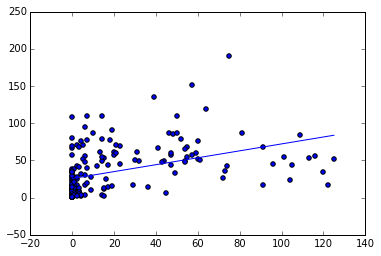

In [329]:
plt.scatter(stations2.crossing, stations2.rentals)
x0 = min(stations2.crossing)
x1 = max(stations2.crossing)
y0 = model.predict(x0)
y1 = model.predict(x1)
plt.plot([x0,x1],[y0,y1])

In [168]:
stations2.rentals

0      1688
1      5113
2      3094
3      1986
4      4231
5      3799
6     13124
7      3727
8      8781
9      4378
10     4167
11    16014
12    40242
13    22625
14    34869
...
170     6266
171      386
172      241
173     1057
174     1448
175     5092
176     6328
177     9369
178      744
179      578
180      508
181     5654
182    22157
183    28560
184     7777
Name: rentals, Length: 185, dtype: int64

In [170]:
stations2.crossing

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      1
10     0
11    47
12    14
13    20
14     6
...
170     91
171      0
172      0
173      4
174      1
175      0
176    122
177     16
178     15
179      2
180      0
181     19
182     47
183      7
184      1
Name: crossing, Length: 185, dtype: int64

In [182]:
quals = ['fast_food',
 'parking',
 'restaurant',
 'convenience',
 'post_office',
 'bicycle_parking',
 'drinking_water',
 'recycling',
 'waste_basket',
 'waste_disposal',
 'cafe',
 'currency_exchange',
 'fountain',
 'ice_cream',
 'optician',
 'pharmacy',
 'tanning_salon',
 'car_sharing',
 'alcohol',
 'bank',
 'bar',
 'club',
 'embassy',
 'food_court',
 'government',
 'internal_kindergarten',
 'kindergarten',
 'place_of_worship',
 'post_box',
 'pub',
 'vending_machine',
 'fuel',
 'grave_yard',
 'public_building',
 'school',
 'fire_station',
 'nightclub',
 'atm',
 'hospital',
 'doctors',
 'theatre',
 'university',
 'clock',
 'parking_entrance',
 'police',
 'cultural_center',
 'stripclub',
 'marketplace',
 'dry_cleaner',
 'bicycle_repair_station',
 'office',
 'arts_centre',
 'library',
 'studio',
 'strip_club',
 'tourist',
 'veterinary',
 'community_centre',
 'compressed_air',
 'tutor',
 'clinic',
 'dentist',
 'bench',
 'cinema',
 'college',
 'parking_exit',
 'bar.restaurant',
 'car_rental',
 'coworking',
 'shelter',
 'bureau_de_change',
 'food_cart',
 'school..historic.',
 'border_control',
 'check_cashing',
 'nail_salon',
 'storage',
 'tax',
 'catering',
 'dojo',
 'tax_service',
 'bus_station',
 'hospital..historic.',
 'toilets',
 'marker',
 'social_facility',
 'telephone',
 'taxi',
 'building',
 'gym',
 'emergency_phone',
 'courthouse',
 'fitness_center',
 'townhall',
 'car_wash',
 'ev_charging',
 'recycling.waste_basket',
 'sign',
 'charging_station',
 'photography',
 'picnic_table',
 'nursing_home',
 'traffic_signals',
 'crossing',
 'motorway_junction',
 'bus_stop',
 'speed_camera',
 'service',
 'stop',
 'turning_circle',
 'elevator',
 'traffic_signals.bus_stop',
 'mini_roundabout',
 'footway',
 'street_lamp',
 'turning_loop',
 'hotel',
 'artwork',
 'information',
 'museum',
 'sculpture',
 'hostel',
 'picnic_site',
 'tour_guide',
 'attraction',
 'landmark',
 'motel',
 'guest_house',
 'gallery']

In [183]:
stations2[quals]

,fast_food,parking,restaurant,convenience,post_office,bicycle_parking,drinking_water,recycling,waste_basket,waste_disposal,...,museum,sculpture,hostel,picnic_site,tour_guide,attraction,landmark,motel,guest_house,gallery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
model.fit(stations2[quals], stations2.rentals)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [270]:
model.coef_

array([  2.31238259e+00,  -2.09162716e-01,   5.70638043e-02,
        -6.31199792e+01,   1.95190000e+00,  -4.28939543e+00,
         5.50570714e+00,   1.88533354e+00,  -3.73790714e-01,
         1.42008832e+12,   2.45690477e+00,   6.89712732e+01,
         4.54372472e+00,  -4.58974500e+12,  -8.76784350e+11,
         5.22966429e+00,   2.20923388e+12,   4.69821366e+00,
         9.11396833e+00,  -3.02424836e+00,   3.22095906e+00,
        -3.74128373e+01,   2.79283540e+01,  -3.83757714e+01,
        -1.56526550e+01,   3.30970179e+11,   1.52153432e+00,
         3.03118706e+00,  -4.25396729e+00,   8.91869397e+00,
        -3.30970179e+11,  -3.06945776e-01,   3.24112848e+00,
         1.29117451e+01,   4.79684970e+00,  -1.95342874e+00,
        -3.43908538e+01,  -1.66489377e+01,   5.33308394e+00,
         5.00729922e+00,   1.14314737e+01,  -5.85254812e+00,
         1.48038067e+02,  -5.72457522e+00,  -1.28297722e+01,
         1.81806780e+02,  -3.64539795e-02,   3.78735020e-01,
        -6.61669786e+00,

In [271]:
sorted(zip(quals, model.coef_), key=lambda pair: abs(pair[1]))

[('turning_loop', -3.6794141970406044e-38),
 ('service', -7.2661411072072677e-05),
 ('stripclub', -0.036453979511101409),
 ('traffic_signals', 0.045323292383902661),
 ('restaurant', 0.057063804276298535),
 ('parking', -0.20916271565456279),
 ('fuel', -0.30694577623588026),
 ('crossing', 0.35032035328826178),
 ('stop', -0.36328270304114652),
 ('waste_basket', -0.37379071364648087),
 ('marketplace', 0.37873501976387269),
 ('bus_stop', -0.62818816474376848),
 ('artwork', -1.0326508328348512),
 ('sculpture', -1.055349610963237),
 ('motorway_junction', -1.0801072972248922),
 ('kindergarten', 1.5215343157739802),
 ('picnic_site', 1.6439508121958482),
 ('information', -1.8270826043517905),
 ('recycling', 1.8853335376308467),
 ('post_office', 1.9519000033741687),
 ('fire_station', -1.9534287391826326),
 ('fast_food', 2.3123825859929164),
 ('attraction', -2.3288752591969297),
 ('cafe', 2.4569047711466303),
 ('bench', -2.9045188778830866),
 ('bank', -3.0242483621963139),
 ('place_of_worship', 3.

In [272]:
predicted = model.predict(stations2[quals])

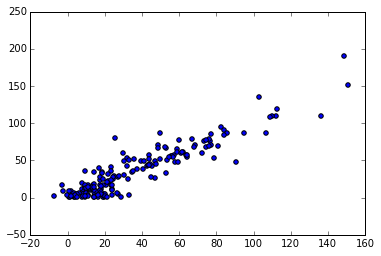

In [273]:
plt.scatter(predicted, stations2.rentals)

In [275]:
len(stations2)

185

In [189]:
from sklearn.cross_validation import train_test_split


In [190]:
x = stations2[quals]
y = stations2.rentals

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [192]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [193]:
model.coef_

array([  6.35230340e+00,  -1.20867488e+01,   8.50064336e-01,
         6.08071840e+01,  -9.77485960e+00,   1.55203205e+01,
         5.36812706e+00,   3.36232307e+00,   3.75811478e+00,
         2.62641788e-12,  -4.57347517e+00,  -1.42109811e-12,
        -6.09944021e+00,   1.89178059e-12,  -7.64892933e-13,
         6.86738858e+00,  -4.00205315e-13,  -3.49401199e+01,
         1.09376047e+02,   2.72552142e+00,   2.17903290e+00,
         6.37736311e+00,   5.31945505e+00,  -8.89060159e+00,
         4.77333926e+01,  -1.64213244e+01,  -7.11823339e-01,
         4.18374780e+00,  -1.23367236e+01,   5.75672915e+00,
        -1.64213244e+01,   5.96404651e+00,   7.99711386e+00,
         1.22546615e+01,   4.83222711e+00,  -1.63417586e+01,
        -4.14078402e+01,   2.83597236e+00,  -1.71393577e+00,
         2.07050190e+00,  -3.20651036e+01,  -5.83367328e+00,
         3.70515491e+01,   2.96624587e+01,  -3.37253337e+01,
         1.03361759e+02,  -2.05775251e+01,  -5.74547691e+01,
        -6.22590444e+01,

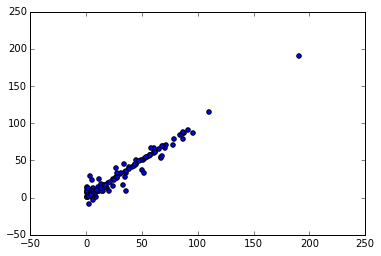

In [194]:
plt.scatter(y_train, model.predict(x_train))

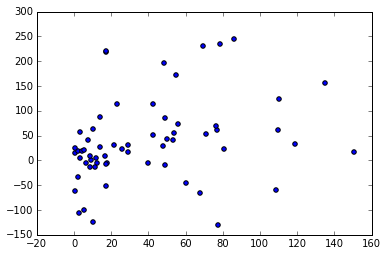

In [195]:
plt.scatter(y_test, model.predict(x_test))

In [308]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=100, max_iter=10000)

In [309]:
model.fit(x_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute='auto', tol=0.0001,
   warm_start=False)

In [310]:
import numpy as np
np.round(model.coef_,1)

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. , -0. ,  0. ,  0. ,  0. ,  0. , -0. ,  0. ,  0. ,  0. ,  0. ,
        0. , -0. , -0. , -0. , -0. ,  0. ,  0. ,  0. , -0. , -0. ,  0. ,
        0. ,  0. , -0. ,  0. ,  0. , -0. , -0. ,  0. ,  0. ,  0. ,  0. ,
       -0. ,  0. ,  0. , -0. , -0. , -0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. , -0. , -0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. , -0. , -0. ,  0. , -0. , -0. ,  0. , -0. , -0. , -0. ,
       -0. ,  0. , -0. , -0. ,  0. ,  0. , -0. , -0. , -0. , -0. , -0. ,
        0. ,  0. , -0. ,  0. , -0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0.1,  0.4, -0. ,  0. ,  0. ,  0. , -0. , -0. ,
        0. ,  0. , -0. , -0. , -0. ,  0. ,  0. , -0. , -0. ,  0. ,  0. ,
       -0. ,  0. ,  0. , -0. , -0. , -0. , -0. ,  0. ])

In [311]:
sorted(zip(quals, model.coef_), key=lambda pair: abs(pair[1]))

[('fast_food', 0.0),
 ('parking', 0.0),
 ('restaurant', 0.0),
 ('convenience', 0.0),
 ('post_office', 0.0),
 ('bicycle_parking', 0.0),
 ('drinking_water', 0.0),
 ('recycling', 0.0),
 ('waste_basket', 0.0),
 ('waste_disposal', 0.0),
 ('cafe', 0.0),
 ('currency_exchange', 0.0),
 ('fountain', -0.0),
 ('ice_cream', 0.0),
 ('optician', 0.0),
 ('pharmacy', 0.0),
 ('tanning_salon', 0.0),
 ('car_sharing', -0.0),
 ('alcohol', 0.0),
 ('bank', 0.0),
 ('bar', 0.0),
 ('club', 0.0),
 ('embassy', 0.0),
 ('food_court', -0.0),
 ('government', -0.0),
 ('internal_kindergarten', -0.0),
 ('kindergarten', -0.0),
 ('place_of_worship', 0.0),
 ('post_box', 0.0),
 ('pub', 0.0),
 ('vending_machine', -0.0),
 ('fuel', -0.0),
 ('grave_yard', 0.0),
 ('public_building', 0.0),
 ('school', 0.0),
 ('fire_station', -0.0),
 ('nightclub', 0.0),
 ('atm', 0.0),
 ('hospital', -0.0),
 ('doctors', -0.0),
 ('theatre', 0.0),
 ('university', 0.0),
 ('clock', 0.0),
 ('parking_entrance', 0.0),
 ('police', -0.0),
 ('cultural_center',

In [312]:
model.score(x_test, y_test)

0.047766946259890086

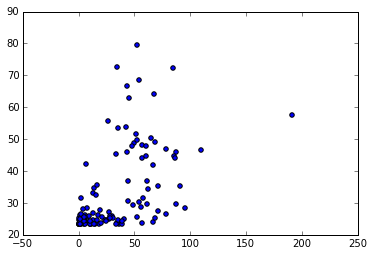

In [313]:
plt.scatter(y_train, model.predict(x_train))

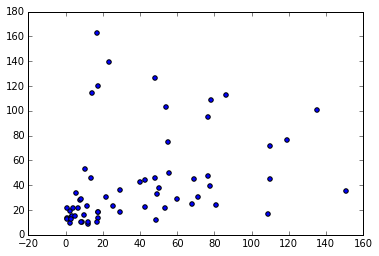

In [284]:
plt.scatter(y_test, model.predict(x_test))

In [226]:
np.corrcoef(y_test, model.predict(x_test))

array([[ 1.        ,  0.33080653],
       [ 0.33080653,  1.        ]])

In [223]:
[pair for pair in zip(quals, model.coef_) if abs(pair[1]) > 0]

[('fast_food', 0.32585579215001453),
 ('parking', -0.31998562989876017),
 ('restaurant', 1.1694703199160448),
 ('drinking_water', 3.0538714955277979),
 ('bank', -0.49970068518893634),
 ('kindergarten', -0.22387818527633283),
 ('place_of_worship', 1.8864249243605633),
 ('post_box', 4.9229928905839779),
 ('school', 1.7139294471103133),
 ('traffic_signals', -0.041145769122606125),
 ('crossing', 0.41392413896059321),
 ('stop', -0.90524069041916899),
 ('hotel', 11.248722454563387)]

In [224]:
r2_score(y_train, model.predict(x_train))

0.6853024034515901

In [225]:
r2_score(y_test, model.predict(x_test))

-0.21337330016917577

In [228]:
usage.cust_type.value_counts()

Registered    1584150
Casual         421958
Subscriber     406416
dtype: int64

In [229]:
usage()

TypeError: 'DataFrame' object is not callable

In [233]:
usage.groupby('cust_type')['duration_mins'].mean()

cust_type
Casual        41.493881
Registered    12.091809
Subscriber    11.383536
Name: duration_mins, dtype: float64

In [234]:
usage

,bike_id,time_start,time_end,duration_mins,station_start,station_end,cust_type,temp,date
0,W01412,2012-01-01 00:04:00,2012-01-01 00:11:00,7,7th & R St NW / Shaw Library,7th & T St NW,Registered,0.370000,2012-01-01
1,W00524,2012-01-01 00:10:00,2012-01-01 00:29:00,19,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Casual,0.370000,2012-01-01
2,W00235,2012-01-01 00:10:00,2012-01-01 00:29:00,19,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Registered,0.370000,2012-01-01
3,W00864,2012-01-01 00:15:00,2012-01-01 00:23:00,8,14th & V St NW,Park Rd & Holmead Pl NW,Registered,0.370000,2012-01-01
4,W00995,2012-01-01 00:15:00,2012-01-01 00:23:00,8,11th & Kenyon St NW,7th & T St NW,Registered,0.370000,2012-01-01
5,W00466,2012-01-01 00:17:00,2012-01-01 00:23:00,6,Court House Metro / 15th & N Uhle St,Lynn & 19th St North,Registered,0.370000,2012-01-01
6,W00525,2012-01-01 00:18:00,2012-01-01 00:47:00,29,37th & O St NW / Georgetown University,9th & Upshur St NW,Registered,0.370000,2012-01-01
7,W00340,2012-01-01 00:22:00,2012-01-01 00:27:00,5,14th & V St NW,15th & P St NW,Registered,0.370000,2012-01-01
8,W00466,2012-01-01 00:24:00,2012-01-01 00:33:00,9,Lynn & 19th St North,25th St & Pennsylvania Ave NW,Registered,0.370000,2012-01-01
9,W00963,2012-01-01 00:25:00,2012-01-01 00:40:00,15,14th & V St NW,L'Enfant Plaza / 7th & C St SW,Registered,0.370000,2012-01-01


In [243]:
usage.pivot_table(index='station_start',columns='cust_type',values='duration_mins', aggfunc=[np.mean, len])

mean             \
cust_type                                            Casual Registered   
station_start                                                            
10th & E St NW                                    41.135981  13.620942   
10th & Monroe St NE                               61.479592  20.478459   
10th & U St NW                                    28.409453  11.215585   
10th St & Constitution Ave NW                     49.939201  15.273347   
11th & H St NE                                    30.741763  11.886388   
11th & Kenyon St NW                               27.233333  16.044243   
12th & Army Navy Dr                               54.793413   8.675048   
12th & L St NW                                    25.910123  10.290961   
12th & Newton St NE                               39.505747  23.194589   
13th & D St NE                                    22.813467  10.750017   
13th & H St NE                                    24.099152  12.985795   
13th St & New York Ave NW                         46.528479  11.355539   
14th & D St NW / Ronald Reagan Building           44.916184  14.327581   
14th & D St SE                                    25.685938  10.815371   
14th & G St NW                                    48.508418  12.338103   
14th & Harvard St NW                              27.204002  11.109028   
14th & R St NW                                    28.874531  10.011749   
14th & Rhode Island Ave NW                        35.216134   9.978650   
14th & V St NW                                    27.513299  10.297435   
14th St & Spring Rd NW                            27.384615  14.065569   
14th St Heights / 14th & Crittenden St NW         29.903890  19.529061   
15th & Crystal Dr                                 58.238650  10.687047   
15th & K St NW                                    39.251266  11.908923   
15th & N Scott St                                 58.842825  14.153296   
15th & P St NW                                    32.210866  10.165773   
15th St & Massachusetts Ave SE                    22.936306  12.603889   
16th & Harvard St NW                              27.474347  10.733680   
17th & Corcoran St NW                             31.624260   9.710947   
17th & K St NW                                    42.182776  11.706077   
17th & K St NW / Farragut Square                  44.081863  11.790673   
...                                                     ...        ...   
N Veitch & Key Blvd                               91.932584  10.203782   
New Hampshire Ave & T St NW                       27.191775   9.678763   
New York Ave & 15th St NW                         46.336511  12.692574   
North Capitol St & F St NW                        39.287762  12.097782   
Ohio Dr & West Basin Dr SW / MLK & FDR Memorials  46.160996  20.524957   
Park Rd & Holmead Pl NW                           26.458057  11.825150   
Pennsylvania & Minnesota Ave SE                   53.220779  15.118971   
Pentagon City Metro / 12th & S Hayes St           49.951507  12.623560   
Potomac & Pennsylvania Ave SE                     25.059322  11.473429   
Potomac Ave & 35th St S                           33.387097        NaN   
Prince St & Union St                              60.337931  20.515152   
Randle Circle & Minnesota Ave SE                  42.096774  21.511111   
Rosslyn Metro / Wilson Blvd & Ft Myer Dr          55.387314  16.582403   
S Glebe & Potomac Ave                             60.059250  12.188932   
S Joyce & Army Navy Dr                            63.433198  13.881135   
Saint Asaph St & Pendleton  St                    48.837349  11.609023   
Smithsonian / Jefferson Dr & 12th St SW           59.502651  18.853372   
Tenleytown / Wisconsin Ave & Albemarle St NW      48.534996  15.004086   
Thomas Circle                                     37.328482  10.369796   
US Dept of State / Virginia Ave & 21st St NW      41.628404  13.282895   
USDA / 12th & Independence Ave SW                 54.576732

In [252]:
mins = usage[['duration_mins']]

In [250]:
casual = usage.cust_type == 'Casual'

In [246]:
from sklearn.linear_model import LogisticRegression


In [247]:
model = LogisticRegression()

model.fit(mins, casual)

In [254]:
model.coef_

array([[ 0.05867854]])

In [255]:
model.intercept_

array([-2.61445367])

In [256]:
predicted = model.predict(mins)

In [258]:
predicted

array([False, False, False, ..., False, False, False], dtype=bool)

In [259]:
casual

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
2412509    False
2412510    False
2412511    False
2412512    False
2412513    False
2412514    False
2412515    False
2412516    False
2412517    False
2412518    False
2412519    False
2412520    False
2412521    False
2412522    False
2412523    False
Name: cust_type, Length: 2412524, dtype: bool

In [260]:
df = DataFrame({"predicted" : predicted, "actual" : casual})

In [261]:
df

,actual,predicted
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [262]:
df.predicted.value_counts()

False    2283741
True      128783
dtype: int64

In [263]:
df.actual.value_counts()

False    1990566
True      421958
dtype: int64

In [265]:
df[~df['actual']]['predicted'].value_counts()

False    1974712
True       15854
dtype: int64